In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import numba as nb

In [28]:
y

array([[-0.8 , -0.8 , -0.8 , -0.8 , -0.8 , -0.8 , -0.8 , -0.8 ],
       [-0.55, -0.55, -0.55, -0.55, -0.55, -0.55, -0.55, -0.55],
       [-0.3 , -0.3 , -0.3 , -0.3 , -0.3 , -0.3 , -0.3 , -0.3 ],
       [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05],
       [ 0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ],
       [ 0.45,  0.45,  0.45,  0.45,  0.45,  0.45,  0.45,  0.45],
       [ 0.7 ,  0.7 ,  0.7 ,  0.7 ,  0.7 ,  0.7 ,  0.7 ,  0.7 ],
       [ 0.95,  0.95,  0.95,  0.95,  0.95,  0.95,  0.95,  0.95]])

<Figure size 720x720 with 0 Axes>

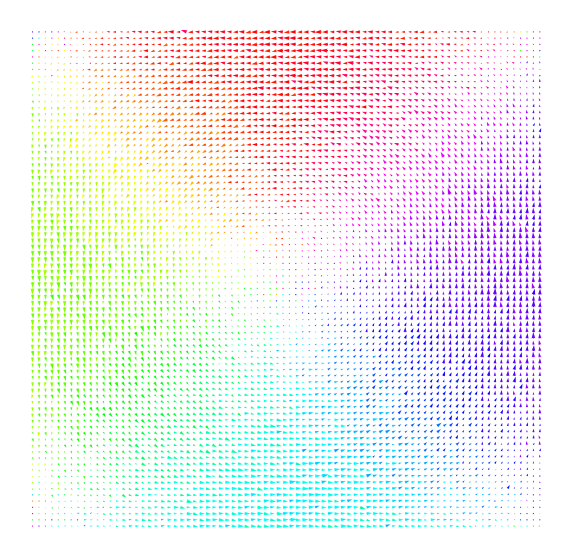

In [175]:
resolution = 80
R = resolution
x, y = np.meshgrid(*[np.linspace(0, 1, R)]*2)

u = np.sin(np.pi * x) * np.cos(np.pi * y)+np.random.normal(0, 0.1, [R, R])
v = -np.cos(np.pi * x) * np.sin(np.pi * y)+np.random.normal(0, 0.1, [R, R])

fig = plt.figure(figsize=(10,)*2)
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()

# Refer to https://stackoverflow.com/a/40026959/10940584
norm = matplotlib.colors.Normalize()
colors = np.arctan2(u, v)
norm.autoscale(colors)
cmap = matplotlib.cm.inferno(norm(colors))

def Norm(a, b):
    return (a ** 2 + b ** 2) ** 0.5

theta = np.angle(np.apply_along_axis(lambda a: complex(*a), 0, np.stack([u, v])))
ax.quiver(x, y, u, v, theta, cmap='hsv')
plt.axis('off')
plt.show()

In [599]:
R = 200
particles = 5

field = np.zeros([2, R, R])
# charge = np.zeros([2, 30, 30])
charge = np.random.uniform(R//4, R//4, [particles, 2])
# simulate as particles?
# for i in range(30):
#     charge[:, tuple(np.random.randint([0,0], charge.shape[1:]))] = 1
canvas = np.zeros([R, R])
# flow = np.stack([u, v]).reshape([R, R, 2])
kernel = [
    [1,2,1],
    [2,4,2],
    [1,2,1],
]
kernel = (np.array(kernel)*2)**2

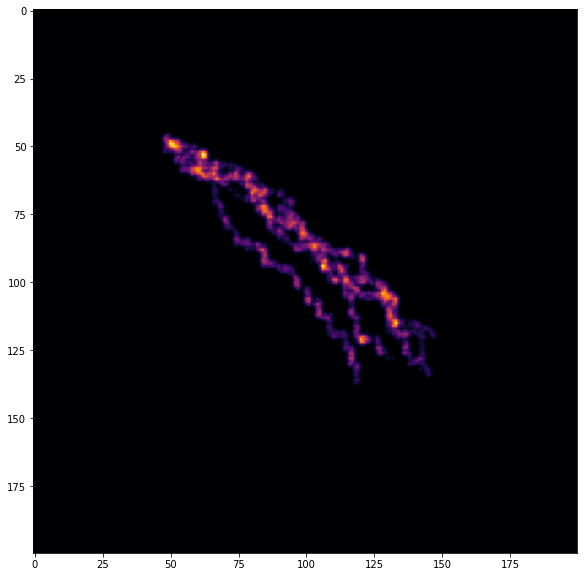

In [599]:
# @nb.njit
def clip(x, a=0, b=R-1):
    return np.clip(a, b, x)
    
for i in range(600):
    for c in range(charge.shape[0]):
        d = charge[c]
#         print(d, flow[tuple(clip(d.astype(np.int)))]*10)
#         print(d)
        
        x, y = d
        r2 = R//2
        delta = np.array([-np.cos(np.pi * (x-r2) * np.random.normal(1, 0.001)), np.sin(np.pi * (y-r2) * np.random.normal(1, 0.001))])*1.4+np.random.normal(0.1, 0.0005)
#         delta = np.random.normal(0.1, 0.1, [2])*3
        charge[c] += delta #np.array()
#         charge[c] += flow[tuple(clip(d.astype(np.int)))]*10
        charge[c] = clip(charge[c])
#         print(tuple(clip(charge[c].astype(np.int))))
#         v = 1
        v = np.linalg.norm(delta)
#         canvas[tuple(clip(charge[c].astype(np.int)))] += v
        z = clip(charge[c].astype(np.int))
        A = tuple(z-1)
        B = tuple(z+2)
#         print(canvas[A[0]:B[0], A[1]:B[1]])
        canvas[A[0]:B[0], A[1]:B[1]] += kernel * v

plt.imshow(canvas**0.9, cmap='inferno')